In [1]:
# To connect google colab to the drive
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import string
import nltk
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from wordcloud import WordCloud, ImageColorGenerator
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Load the dataset
df = pd.read_csv("/content/gdrive/My Drive/SBRS_Project/sample30.csv")

In [5]:
# Check the first 5 rows of the dataset
df.head(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [6]:
# Check the dimension of the data
df.shape

(30000, 15)

In [7]:
# Check the datatypes in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [8]:
# Check the missing percentage in the data
df.isnull().sum()/len(df.index)*100

id                       0.000000
brand                    0.000000
categories               0.000000
manufacturer             0.470000
name                     0.000000
reviews_date             0.153333
reviews_didPurchase     46.893333
reviews_doRecommend      8.566667
reviews_rating           0.000000
reviews_text             0.000000
reviews_title            0.633333
reviews_userCity        93.570000
reviews_userProvince    99.433333
reviews_username         0.210000
user_sentiment           0.003333
dtype: float64

From the above missing percentage from the columns, I am dropping reviews_usercity,reviews_userProvince,reviews_didPurchase,reviews_doRecommend,reviews_date

In [9]:
df_1 = df.drop(['reviews_date','reviews_didPurchase','reviews_doRecommend','reviews_userCity','reviews_userProvince'],axis = 1)

In [10]:
# Check the new dataset 
df_1.head(5)

,id,brand,categories,manufacturer,name,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative


In [11]:
# Check the dimension of the new dataset
df_1.shape

(30000, 10)

In [12]:
# Check the missing value percentage of the remaining columns
df_1.isnull().sum()/len(df_1.index)*100

id                  0.000000
brand               0.000000
categories          0.000000
manufacturer        0.470000
name                0.000000
reviews_rating      0.000000
reviews_text        0.000000
reviews_title       0.633333
reviews_username    0.210000
user_sentiment      0.003333
dtype: float64

After reviewing the text for the user sentiment which is null, it is discovered that the sentiment iof the user is positive. I am replacing blank of this user sentiment with positive

In [13]:
df_1['user_sentiment'].fillna('Positive',inplace = True)

After reviewing the missing values for manufacturer, it is observed that all missing values are related to one product "Alex cross(dvdvideos)" and the manufacturer of that product is "Summit Entertainment".

In [14]:
df_1['manufacturer'].fillna('Summit Entertainment',inplace = True)

In [15]:
# Check the missing value percentage of the dataser now, after placing the replacing the missing value for the above columns
df_1.isnull().sum()/len(df.index)*100

id                  0.000000
brand               0.000000
categories          0.000000
manufacturer        0.000000
name                0.000000
reviews_rating      0.000000
reviews_text        0.000000
reviews_title       0.633333
reviews_username    0.210000
user_sentiment      0.000000
dtype: float64

##### Replace the missing value of the column "reviews_title" with a single space

In [16]:
df_1['reviews_title'].fillna(' ',inplace = True)

## Exploratory Data Analysis

In [17]:
# Analysis the variable 'brand'
df_1.brand.nunique()

214

In [18]:
df_1.brand.value_counts().sort_values(ascending = False)

Clorox                            10585
Warner Home Video                  3325
Disney                             1200
L'oreal Paris                      1186
FOX                                 887
                                  ...  
Citrus Magic                          1
Universal Music                       1
Jake And The Neverland Pirates        1
Udi's                                 1
Heinz                                 1
Name: brand, Length: 214, dtype: int64

In [19]:
df5 = pd.crosstab(df_1['brand'], df_1['user_sentiment'], margins=False,values=df_1['id'] , 
                 dropna=False, aggfunc='count').reset_index().fillna(0)

In [20]:
df5.sort_values(by='Positive', ascending = False)[0:10]

user_sentiment,brand,Negative,Positive
47,Clorox,977.0,9608.0
202,Warner Home Video,291.0,3034.0
98,L'oreal Paris,39.0,1147.0
57,Disney,84.0,1116.0
28,Burt's Bees,105.0,776.0
61,FOX,128.0,759.0
176,Summit Entertainment,58.0,755.0
166,Sony Pictures,159.0,686.0
194,Universal Home Video,27.0,641.0
132,Olay,69.0,568.0


### Top 5 brands prefered by the users are "Clorox","Warner Home Video","L'oreal Paris","Disney","Burt's Bees" and "Fox"

##### Analyse the variable "categories"

In [21]:
# No. of unique categories
df_1.categories.nunique()

270

In [22]:
df_cat = df_1.categories.value_counts().sort_values(ascending = False)

In [23]:
df_cat_dataframe = pd.DataFrame(df_cat)

In [24]:
df_cat_dataframe[0:10]

,categories
"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",8545
"Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys",3325
"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",2039
"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",1186
"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,Blu-Rays,See ALL Blu-Ray,Frys",1143
"Personal Care,Makeup,Lipstick, Lip Gloss, & Lip Balm,Lip Gloss,Beauty,Lips,Beauty & Personal Care,Skin Care,Lip Care,Lip Balms & Treatments",873
"Movies, Music & Books,Ways To Shop Entertainment,Movie & Tv Box Sets,Movies,Horror,Movies & TV Shows,All Horror,Movies & Tv On Blu-Ray,Movies & TV,Blu-ray,Action & Adventure,Movies & Music,Holiday Shop",845
"Movies & TV Shows,Movies,Romance,Romantic Comedies,Movies, Music & Books,Comedy,Movies & TV,Ways To Shop Entertainment,Recent Release & 4k Movies Sale,Movies & Music,Holiday Shop",757
"Personal Care,Hair Care,Styling Gel/Lotion,Beauty,Salon Hair Care,Styling Products,Featured Brands,Health & Beauty,Unilever,Ways To Shop",693
"Movies & TV Shows,Instawatch Movies By VUDU,Shop Instawatch,Movies, Music & Books,Movies,Action & Adventure,Movies & TV,Movies & Music,Special Editions,Comedy,Studio Specials,Instawatch",672


#### The most purchased product categories are "Household Essentials","Movies,Music,Books" and "House Cleaners"

#### Analyse the variable "Manufacturer"

In [25]:
# no. of unique manufacturer
df_1.manufacturer.nunique()

227

In [26]:
df_1.manufacturer.value_counts().sort_values(ascending = False)

Clorox            8546
Test              3325
AmazonUs/CLOO7    2039
L'oreal Paris     1232
Walt Disney       1143
                  ... 
JNH Lifestyles       1
Citrus Magic         1
Disney               1
LDR                  1
Wmu                  1
Name: manufacturer, Length: 227, dtype: int64

#### Analyse the variable "name"

In [27]:
# check the no. of unique name of the product"
df_1.name.nunique()

271

In [28]:
df_1.name.value_counts().sort_values(ascending = False)

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                       8545
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                 3325
Clorox Disinfecting Bathroom Cleaner                                                            2039
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz                  1186
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                             1143
                                                                                                ... 
Southern Enterprises Archer Fold-Away Home Bar in Walnut                                           1
Progresso Traditional Meatball & Rice Soup                                                         1
Udi's Pepperoni Pizza                                                                              1
Lite Source Basic Ii 1-Lt Floor Lamp - Dark Bronze                                         

##### The most purchased and reviewed products are "Clorox Disinfecting wipes","Godzilla","Clorox Disinfecting Cleaner","L'oreal Conditioner"

### Analyse the variable "reviews_rating"

In [29]:
# chekc the distrinution of the rating in the datasetr
df_rating_dataframe = df_1.reviews_rating.value_counts().rename_axis('Ratings').reset_index(name='counts')

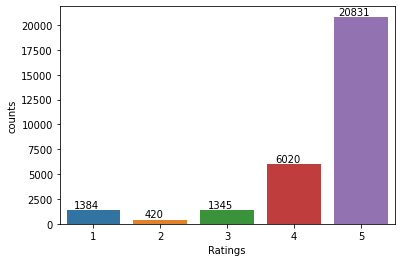

In [30]:
graph = sns.barplot(x = 'Ratings',
            y = 'counts',
            data = df_rating_dataframe)
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

#### Out of the total reviews of 30000, 69%(20831/30000) of the reviews have '5' rating, followed by '4' rating which contributes 20% (6020/30000). Majority of the users have provided higher ratings for the product which means that they are very much satisfied with the product.

#### Anlyse the user sentiments variable


In [31]:
df_1.user_sentiment.value_counts().sort_values(ascending = False)

Positive    26633
Negative     3367
Name: user_sentiment, dtype: int64

#### 89% of the users have shown positive sentiments for the products they have purchased.

In [32]:
## Analyse the relationship of ratings and the sentiments of the users
df_rating_sentiment = pd.crosstab(df_1['reviews_rating'], df_1['user_sentiment'], margins=False,values=df_1['id'] , 
                 dropna=False, aggfunc='count').fillna(0)

In [33]:
df_rating_sentiment

user_sentiment,Negative,Positive
reviews_rating,,
1,597,787
2,140,280
3,220,1125
4,550,5470
5,1860,18971


#### Majority of the users who have given ratings '1' abd '2',have shown positive sentiments for the products purchased. Though the rating provided was low.

#### Analyse review text length and the review rating

In [34]:
## Calculate the lengthof the text
df_1['review_len'] = df_1.reviews_text.astype(str).apply(len)

In [35]:
df_1.head(5)

,id,brand,categories,manufacturer,name,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,review_len
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,201
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,62
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Good,dorothy w,Positive,12
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,696
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,132


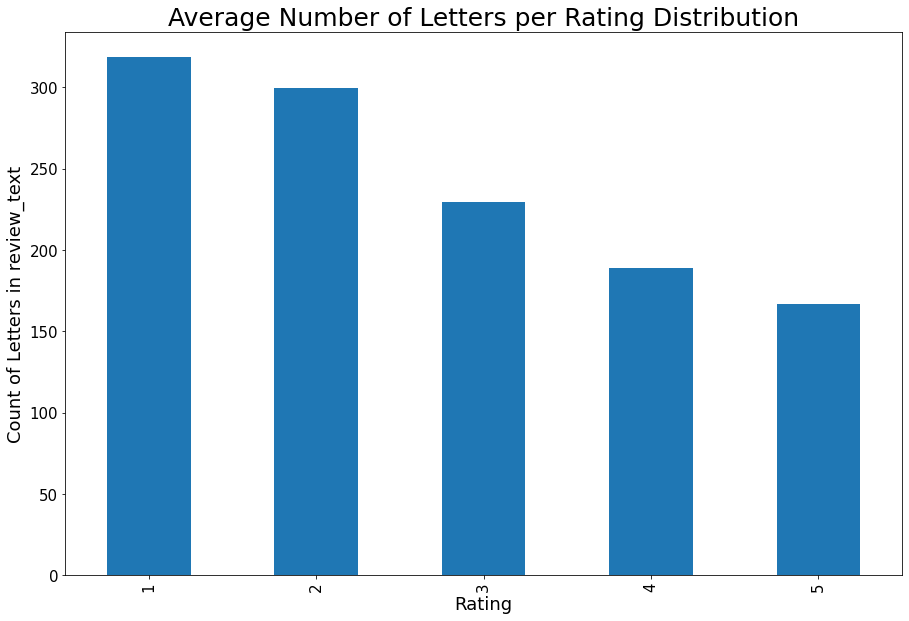

In [36]:
## Show the Average number of letters per rating distribution
letter_avg = df_1.groupby('reviews_rating')['review_len'].mean().plot(kind = 'bar', figsize = (15,10))
plt.xlabel('Rating', fontsize=18)
plt.ylabel('Count of Letters in review_text', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Average Number of Letters per Rating Distribution', fontsize=25)
plt.show()

Users who have given less ratings have descibed their disappointment by describing their experience in a detailed manner.As a result, the average length of the text is  300 per review for lower ratings. On the other hand,users who are very happy have praised about the products in few words as a result, the average length of those text is 180 per review. 

## Text Cleaning

### Check the quality of the review text

In [37]:
for index,text in enumerate(df_1['reviews_text'][10:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 tried it with my husband and felt no different there was no effect no change first te using ky gel not sure if i want to try any others...
Review 2:
 Purchased this thinking it would have some sort of warming effect but it's the same as the original. Don't waste your money.
Review 3:
 Bought this to enhance our time a bit, did abslutely nothing very disappointed especially because its almost 20!
Review 4:
 I bought this after really liking the his n hers variety but this is nothing like that very disappointed with this product.
Review 5:
 First time purchase of this type of product. Maybe I expected too much. Did not think there was any warming feeling at all. Left us sticky! Even after trying to was it off.
Review 6:
 I bought this and tried this with my wife but we did not enjoy it ..we did not feel anything enhancement with this product at all such as the his-her product.
Review 7:
 I bought this product to spice things up with my fianc and it didn't do anything! No passi

 ### The text needs to be cleaned by removing the following:

    a) Expand contraction
    b) Change to lower case
    c) Remove Punctuation
    d) Remove Special Characters
    e) Remove Digits

#### Expand Contraction

In [38]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}



In [39]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [40]:
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df_1['reviews_text']=df_1['reviews_text'].apply(lambda x:expand_contractions(x))

#### Lower Case

In [41]:
df_1['cleaned_text'] = df_1['reviews_text'].apply(lambda x: x.lower())

### Remove special characters

In [42]:
df_1['cleaned_text']=df_1['cleaned_text'].apply(lambda x: re.sub('\!*\.{2,}',' ', x))

#### Remove digits and words containing digits form text

In [43]:
df_1['cleaned_text']=df_1['cleaned_text'].apply(lambda x: re.sub('\w*\d\w*',' ', x))

### Remove Punctuation

In [44]:
df_1['cleaned_text'] = df_1['cleaned_text'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))

#### Look at the cleaned reviews

In [45]:
for index,text in enumerate(df_1['cleaned_text'][10:50]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 tried it with my husband and felt no different there was no effect no change first te using ky gel not sure if i want to try any others 
Review 2:
 purchased this thinking it would have some sort of warming effect but it is the same as the original  don t waste your money 
Review 3:
 bought this to enhance our time a bit  did abslutely nothing very disappointed especially because its almost   
Review 4:
 i bought this after really liking the his n hers variety but this is nothing like that very disappointed with this product 
Review 5:
 first time purchase of this type of product  maybe i expected too much  did not think there was any warming feeling at all  left us sticky  even after trying to was it off 
Review 6:
 i bought this and tried this with my wife but we did not enjoy it  we did not feel anything enhancement with this product at all such as the his her product 
Review 7:
 i bought this product to spice things up with my fianc and it did not do anything  no passion

#### Text Preprocessing

There are multiple steps in text preprocessing
a) Stop word removal
b) Stemming
c) Lemmatization
In order to conduct the above activities, text will be coneverted to tokens

#### Stopword Removal and Lemmatization

In [46]:
# STOPWORD REMOVAL
stopwords = nltk.corpus.stopwords.words('english')
new_stopwords = ['product','would','review','go','also','day','come','every','could','year','part','collect','collect ','one','get','promotion','use','time']
stopwords.extend(new_stopwords)

def stopword(string):
    a= [i for i in string.split() if i not in stopwords]
    
    
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [47]:
stopwords


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
def finalpreprocess(string):
    return lemmatizer(stopword((string)))
df_1['Preprocess_text'] = df_1['cleaned_text'].apply(lambda x: finalpreprocess(x))
df_1.head()

,id,brand,categories,manufacturer,name,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,review_len,cleaned_text,Preprocess_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it is very good. more to th...,Just Awesome,joshua,Positive,201,i love this album it is very good more to th...,love album good hip hop side current pop sound...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,62,good flavor this review was collected as part...,good flavor collect
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Good,dorothy w,Positive,12,good flavor,good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,696,i read through the reviews on here before look...,read review look buying couple lubricant ultim...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,132,my husband bought this gel for us the gel cau...,husband buy gel u gel caused irritation felt l...


In [49]:
## define a function to convert all the reviews in each row to tokens
def identify_tokens(string):
  
  tokens = nltk.word_tokenize(string)
  return tokens

In [50]:
df_1['token_words'] = df_1['Preprocess_text'].apply(lambda x: identify_tokens(x))

In [51]:
df_1.head()

,id,brand,categories,manufacturer,name,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,review_len,cleaned_text,Preprocess_text,token_words
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it is very good. more to th...,Just Awesome,joshua,Positive,201,i love this album it is very good more to th...,love album good hip hop side current pop sound...,"[love, album, good, hip, hop, side, current, p..."
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,62,good flavor this review was collected as part...,good flavor collect,"[good, flavor, collect]"
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Good,dorothy w,Positive,12,good flavor,good flavor,"[good, flavor]"
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,696,i read through the reviews on here before look...,read review look buying couple lubricant ultim...,"[read, review, look, buying, couple, lubricant..."
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,132,my husband bought this gel for us the gel cau...,husband buy gel u gel caused irritation felt l...,"[husband, buy, gel, u, gel, caused, irritation..."


#### Term Frequency Analysis for positive and negative sentiments

In [52]:
df_positive = df_1[df_1['user_sentiment']=='Positive']

In [53]:
df_negative = df_1[df_1['user_sentiment']=='Negative']

In [54]:
###Analyse frequent words for Positive sentiments
words_pos = df_positive['token_words'] 
allwords = []
for wordlist in words_pos:
    allwords += wordlist
print(allwords)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



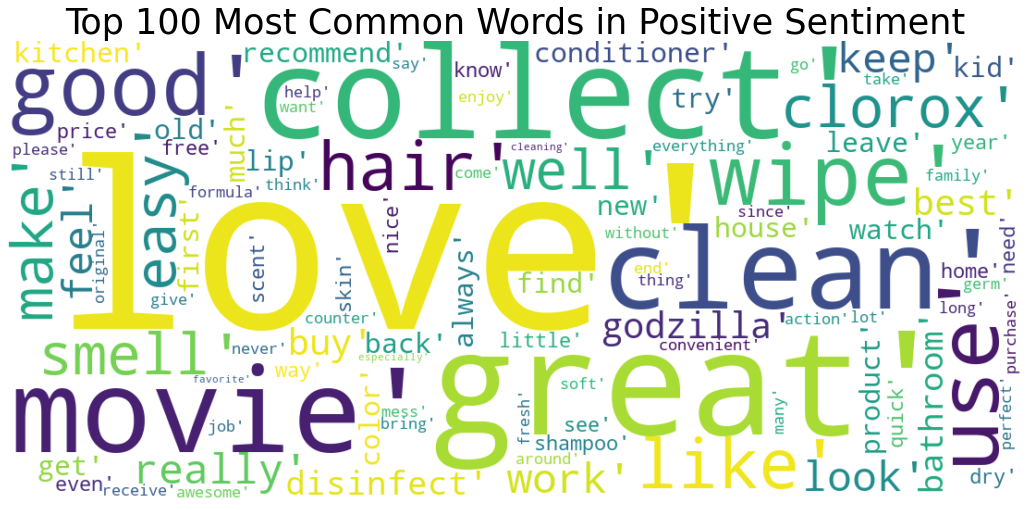

In [55]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1100, height=500, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(15,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words in Positive Sentiment', fontsize=35)
plt.tight_layout(pad=0)
plt.show()

In [56]:
mostcommon[0:100]

[('love', 9573),
 ('great', 8911),
 ('collect', 7791),
 ('movie', 7036),
 ('clean', 6995),
 ('wipe', 6031),
 ('good', 4889),
 ('use', 4253),
 ('like', 4249),
 ('hair', 4243),
 ('clorox', 3998),
 ('smell', 3719),
 ('make', 3543),
 ('easy', 3474),
 ('well', 3221),
 ('really', 2653),
 ('work', 2573),
 ('look', 2229),
 ('keep', 2124),
 ('feel', 2079),
 ('godzilla', 1975),
 ('buy', 1945),
 ('best', 1919),
 ('disinfect', 1903),
 ('bathroom', 1854),
 ('conditioner', 1788),
 ('much', 1651),
 ('color', 1621),
 ('product', 1619),
 ('old', 1583),
 ('get', 1579),
 ('house', 1562),
 ('always', 1487),
 ('kitchen', 1485),
 ('watch', 1461),
 ('try', 1459),
 ('recommend', 1444),
 ('new', 1429),
 ('leave', 1424),
 ('first', 1401),
 ('find', 1399),
 ('lip', 1376),
 ('back', 1362),
 ('kid', 1316),
 ('shampoo', 1314),
 ('see', 1309),
 ('scent', 1299),
 ('year', 1295),
 ('need', 1261),
 ('know', 1259),
 ('price', 1226),
 ('dry', 1225),
 ('even', 1210),
 ('nice', 1171),
 ('free', 1168),
 ('little', 1165),
 (

In [57]:
### Analyse frequest words for Negative sentiments
words_pos = df_negative['token_words'] 
allwords = []
for wordlist in words_pos:
    allwords += wordlist
print(allwords)


['read', 'review', 'look', 'buying', 'couple', 'lubricant', 'ultimately', 'disappointed', 'even', 'live', 'review', 'read', 'starter', 'neither', 'boyfriend', 'notice', 'sort', 'enhance', 'captivate', 'sensation', 'notice', 'however', 'messy', 'consistency', 'reminiscent', 'liquid', 'vaseline', 'difficult', 'clean', 'pleasant', 'especially', 'since', 'lack', 'captivate', 'sensation', 'expect', 'disappoint', 'pay', 'much', 'lube', 'normal', 'personal', 'lubricant', 'less', 'money', 'less', 'mess', 'husband', 'buy', 'gel', 'u', 'gel', 'caused', 'irritation', 'felt', 'like', 'burn', 'skin', 'recommend', 'gel', 'boyfriend', 'buy', 'spice', 'thing', 'bedroom', 'highly', 'disappointed', 'buy', 'absolutely', 'love', 'ky', 'mine', 'think', 'similar', 'affect', 'absolutely', 'nothing', 'buy', 'buy', 'earlier', 'today', 'excite', 'check', 'base', 'description', 'expect', 'something', 'like', 'regular', 'ky', 'fan', 'expect', 'left', 'little', 'disappointed', 'bought', 'husband', 'try', 'impress'

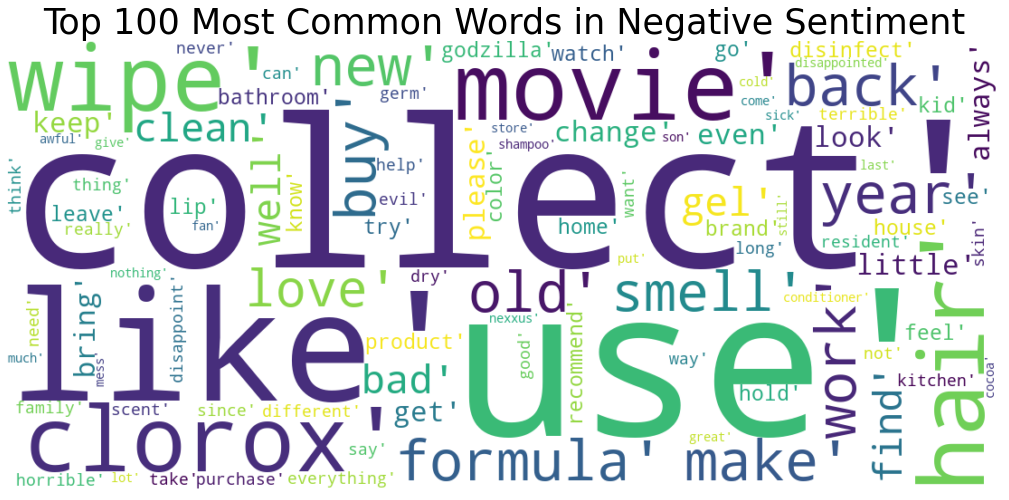

In [58]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1100, height=500, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(15,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words in Negative Sentiment', fontsize=35)
plt.tight_layout(pad=0)
plt.show()

In [59]:
mostcommon[0:100]

[('collect', 786),
 ('use', 683),
 ('like', 666),
 ('movie', 606),
 ('wipe', 572),
 ('clorox', 416),
 ('hair', 398),
 ('formula', 373),
 ('new', 349),
 ('make', 347),
 ('back', 331),
 ('year', 330),
 ('old', 319),
 ('buy', 314),
 ('work', 313),
 ('smell', 308),
 ('love', 303),
 ('clean', 294),
 ('bad', 277),
 ('gel', 274),
 ('well', 274),
 ('find', 225),
 ('change', 216),
 ('look', 215),
 ('please', 215),
 ('always', 214),
 ('get', 209),
 ('keep', 205),
 ('bring', 201),
 ('even', 184),
 ('little', 178),
 ('godzilla', 171),
 ('color', 169),
 ('house', 166),
 ('go', 162),
 ('disinfect', 160),
 ('try', 155),
 ('feel', 155),
 ('leave', 154),
 ('bathroom', 153),
 ('product', 152),
 ('see', 151),
 ('know', 148),
 ('watch', 145),
 ('hold', 144),
 ('brand', 143),
 ('lip', 143),
 ('kid', 140),
 ('recommend', 139),
 ('home', 138),
 ('everything', 137),
 ('really', 136),
 ('germ', 136),
 ('kitchen', 134),
 ('skin', 132),
 ('take', 132),
 ('good', 129),
 ('long', 123),
 ('can', 122),
 ('need', 121

### Split the dataset into Train and Test


#### Encoding - Label encode the target variable

### OverSampling, UnderSampling technique for imbalance class

### Run the model without the imbalance treatment

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words=None, max_features=100000, ngram_range=(1, 3))
lr = LogisticRegression()

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

def lr_cv(splits, X, Y, pipeline, average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        lr_fit = pipeline.fit(X[train], Y[train])
        prediction = lr_fit.predict(X[test])
        scores = lr_fit.score(X[test],Y[test])
        
        accuracy.append(scores * 100)
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        print('         negative            positive')
        print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], prediction, average=None))
        print('-'*50)

    print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
    print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
    print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
    print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))

In [62]:
from sklearn.pipeline import Pipeline
original_pipeline = Pipeline([
    ('vectorizer', tvec),
    ('classifier', lr)
])
lr_cv(5, df_1.Preprocess_text, df_1.user_sentiment, original_pipeline, 'macro')

         negative            positive
precision: [0.88888889 0.89966159]
recall:    [0.11887073 0.99812277]
f1 score:  [0.20969856 0.94633799]
--------------------------------------------------
         negative            positive
precision: [0.89908257 0.90239348]
recall:    [0.14561664 0.99793505]
f1 score:  [0.25063939 0.94776252]
--------------------------------------------------
         negative            positive
precision: [0.91919192 0.90137265]
recall:    [0.13521545 0.99849822]
f1 score:  [0.2357513 0.9474528]
--------------------------------------------------
         negative            positive
precision: [0.85416667 0.899729  ]
recall:    [0.12166172 0.99737139]
f1 score:  [0.21298701 0.9460374 ]
--------------------------------------------------
         negative            positive
precision: [0.90816327 0.90088106]
recall:    [0.13204748 0.99831018]
f1 score:  [0.23056995 0.94709654]
--------------------------------------------------
accuracy: 90.07% (+/- 0.13%)
pre

#### In the above run without treating the class imbalance, we can see that recall is very low for negative calss, it is around 14%. And the recall is much for positicve class which is around 99%. And overall FI score is also very low at around 21% for negative class. 

#### Over Sampling
There is a very useful Python package called “imbalanced-learn”, which helps you deal with class imbalance issues, it is compatible with Scikit Learn, and easy to implement.
Within imbalanced-learn, there are different techniques you can use for oversampling. I will use below options                                                    
RandomOverSampler  and 
SMOTE (Synthetic Minority Over-Sampling Technique)

#### RandomOverSampler

In [63]:
pip install -U imbalanced-learn 

     |████████████████████████████████| 206 kB 7.7 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [64]:
pip install delayed

     |████████████████████████████████| 72 kB 596 kB/s 
     |████████████████████████████████| 85 kB 3.9 MB/s 


In [66]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
ROS_pipeline = make_pipeline(tvec, RandomOverSampler(random_state=777),lr)
SMOTE_pipeline = make_pipeline(tvec, SMOTE(random_state=777),lr)

ImportError: ignored

In [152]:
lr_cv(5, df_1.Preprocess_text, df_1.user_sentiment, ROS_pipeline, 'macro')

         negative            positive
precision: [0.5988764  0.97260274]
recall:    [0.79197623 0.93298292]
f1 score:  [0.68202175 0.95238095]
--------------------------------------------------
         negative            positive
precision: [0.62356979 0.97502926]
recall:    [0.80980684 0.93823916]
f1 score:  [0.70458953 0.95628049]
--------------------------------------------------
         negative            positive
precision: [0.6155633  0.97217357]
recall:    [0.78751857 0.93786371]
f1 score:  [0.69100391 0.95471049]
--------------------------------------------------
         negative            positive
precision: [0.62382075 0.97185559]
recall:    [0.78486647 0.94010514]
f1 score:  [0.69513798 0.95571674]
--------------------------------------------------
         negative            positive
precision: [0.59977195 0.97111068]
recall:    [0.78041543 0.93409688]
f1 score:  [0.67827208 0.95224423]
--------------------------------------------------
accuracy: 92.03% (+/- 0.28%)
p

 #### After applying Randomeoversampler, recall for the negative class has ioncresed to 78%, but the precision of negative class has gone down to around 60%. Buty the recall and precision is high for the positive class.FI score has improved for the negative class to around 67%.

##### Applying SMOTE

In [153]:
lr_cv(5, df_1.Preprocess_text, df_1.user_sentiment, SMOTE_pipeline, 'macro')

         negative            positive
precision: [0.63142438 0.95431472]
recall:    [0.63893016 0.95288155]
f1 score:  [0.6351551 0.9535976]
--------------------------------------------------
         negative            positive
precision: [0.67099567 0.96080648]
recall:    [0.69093611 0.95719917]
f1 score:  [0.68081991 0.95899944]
--------------------------------------------------
         negative            positive
precision: [0.67846608 0.95997745]
recall:    [0.68350669 0.9590764 ]
f1 score:  [0.68097705 0.95952672]
--------------------------------------------------
         negative            positive
precision: [0.68518519 0.95702541]
recall:    [0.65875371 0.96169733]
f1 score:  [0.67170953 0.95935568]
--------------------------------------------------
         negative            positive
precision: [0.67208272 0.95885779]
recall:    [0.67507418 0.95831769]
f1 score:  [0.67357513 0.95858766]
--------------------------------------------------
accuracy: 92.55% (+/- 0.39%)
pre

#### After applying SMOTE, precison has improved to around 67% for negative class and recall for negative calss is at 68%. Overall the performnace has improved as FI score and accuracy has improved.

#### UnderSampling

###### To apply Randomeundersampling for imbalnce class

In [154]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.pipeline import make_pipeline

In [155]:
RUS_pipeline = make_pipeline(tvec, RandomUnderSampler(random_state=777),lr)

In [156]:
lr_cv(5, df_1.Preprocess_text, df_1.user_sentiment, RUS_pipeline, 'macro')

         negative            positive
precision: [0.3869908  0.98124163]
recall:    [0.87518574 0.82485451]
f1 score:  [0.53667426 0.89627741]
--------------------------------------------------
         negative            positive
precision: [0.39908257 0.98569513]
recall:    [0.90490342 0.82785808]
f1 score:  [0.55388813 0.89990817]
--------------------------------------------------
         negative            positive
precision: [0.4085282  0.98262209]
recall:    [0.88261516 0.83855829]
f1 score:  [0.55853315 0.90489213]
--------------------------------------------------
         negative            positive
precision: [0.41013185 0.98179425]
recall:    [0.8768546  0.84040556]
f1 score:  [0.55886525 0.90561457]
--------------------------------------------------
         negative            positive
precision: [0.3962141  0.98500448]
recall:    [0.90059347 0.8263237 ]
f1 score:  [0.55031732 0.8987135 ]
--------------------------------------------------
accuracy: 83.79% (+/- 0.53%)
p

#### After applying Random undersampler, the precision for negative class has gone down significantly. Overall Accuracy and F1 score has also gone down .

### After applying the different sampling techniques to treat the imbalance class,I have finalized SMOTE as the technique to treat the imbalance class

To fit ML algorithms a) Logistic Regression b) Random Forest c) XGBoost with hyperparamter tuning to get the best model out of the three

#### Logistic Regression

#### FIrst split the dataset into train and test

In [ ]:
tv = TfidfVectorizer(stop_words=None, max_features=100000)

In [ ]:
tv.fit(df_1['Preprocess_text'])

In [ ]:
train,test = train_test_split(df_1,test_size = 0.3)

In [ ]:
train_tfidf = tv.transform(train['Preprocess_text'])
test_tfidf = tv.transform(test['Preprocess_text'])

In [ ]:
train_tfidf.shape

In [ ]:
test_tfidf.shape

In [ ]:
train_y = train['user_sentiment']
test_y = test['user_sentiment']

In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(train_y)
Test_Y = Encoder.fit_transform(test_y)

In [ ]:
smt = SMOTE(random_state=777, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_resample(train_tfidf, Train_Y)

In [164]:
## TF-idf on Test data
X_Smote_Test,Y_Smote_Test =  smt.fit_resample(test_tfidf, Test_Y)

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
lr = LogisticRegression(random_state=42)


rf = RandomForestClassifier(random_state=42)

In [168]:
# Set grid search params
param_range = [9, 10]
param_range_fl = [1.0, 0.5]

grid_params_lr = [{'penalty': ['l1', 'l2'],
        'C': param_range_fl,
        'solver': ['liblinear']}] 


grid_params_rf = [{'criterion': ['gini', 'entropy'],
        'max_depth': param_range,
        'min_samples_split': param_range[1:]}]



# Construct grid searches
jobs = -1

LR = GridSearchCV(estimator=lr,
            param_grid=grid_params_lr,
            scoring='roc_auc',
            cv=5) 



RF = GridSearchCV(estimator=rf,
            param_grid=grid_params_rf,
            scoring='roc_auc',
            cv=5, 
            n_jobs=jobs)






# List of pipelines for iterating through each of them
grids = [LR,RF]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
        1: 'Random Forest'
        }

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_SMOTE, y_SMOTE)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_Smote_Test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

# Save best grid search pipeline to file
dump_file = 'best_grid_search_pipeline.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))

Performing model optimizations...

Estimator: Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best params are : {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best training accuracy: 0.984


ValueError: ignored

In [163]:
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state=88)
smt = SMOTE(random_state=777, k_neighbors=1)
##adasyn = ADASYN(random_state=88)
grid = {'classifier__penalty' : ['l1', 'l2'],
        'classifier__C' : np.logspace(-4, 4, 20)
        }
pipeline = Pipeline([('smt', smt), ('lr', lr)])
grid_cv = GridSearchCV(estimator = pipeline, grid= grid, scoring = 'roc_auc', cv = 5)
   
grid_cv.fit(Train_X_tfidf, Train_Y)
grid_cv.best_score_

TypeError: ignored

In [ ]:
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20)]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                stratify=y,random_state = 88)
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.transform(X_test)
adasyn = ADASYN(random_state=88)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

In [ ]:
from imblearn.pipeline import make_pipeline, Pipeline
rf = RandomForestClassifier(random_state=88)
adasyn = ADASYN(random_state=88)
grid = {'class__n_estimators': [200, 500],
        'class__max_features': ['auto', 'sqrt', 'log2'],
        'class__max_depth' : [4,5,6,7,8],
        'class__criterion' :['gini', 'entropy']}
pipeline = Pipeline([('sampling', adasyn), ('class', rf)])
grid_cv = GridSearchCV(pipeline, grid, scoring = 'roc_auc', cv = 5)
   
grid_cv.fit(X_train_scaled, y_train)
grid_cv.best_score_

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
models = [{'name': 'logreg','label': 'Logistic Regression',
           'classifier': LogisticRegression(random_state=88),
           'grid': {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}},
          
          {'name': 'knn','label':'K Nearest Neighbors',
           'classifier':KNeighborsClassifier(),
           'grid': {"n_neighbors":np.arange(8)+1}},
          
          {'name': 'dsc','label': 'Descision Tree', 
           'classifier': DecisionTreeClassifier(random_state=88),
           'grid': {"max_depth":np.arange(8)+1}},
          
          {'name': 'rf', 'label': 'Random Forest',
           'classifier': RandomForestClassifier(random_state=88),
           'grid': {'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}},
          
          {'name': 'svm_rbf', 'label': 'SVC (RBF)',
           'classifier':SVC(random_state=88),
           'grid': {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}}]

In [ ]:
## XGboost
'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
 'gamma':[i/10.0 for i in range(0,5)]
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
 